In [6]:


import numpy as np
import pandas as pd


import os


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import keras

import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *


In [8]:
imgs_dir = "C:\\Users\\jhanu\\Downloads\\internship\\segmentation_full_body_mads_dataset_1192_img\\segmentation_full_body_mads_dataset_1192_img\\images"
masks_dir = "C:\\Users\\jhanu\\Downloads\\internship\\segmentation_full_body_mads_dataset_1192_img\\segmentation_full_body_mads_dataset_1192_img\\masks"

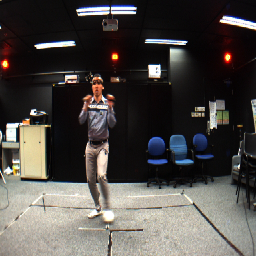

In [9]:
load_img(os.path.join(imgs_dir, os.listdir(imgs_dir)[0]), target_size = (256, 256, 3))

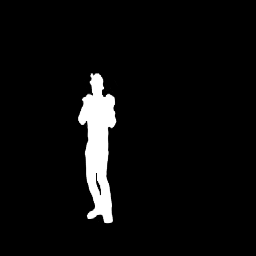

In [10]:
load_img(os.path.join(masks_dir, os.listdir(masks_dir)[0]), target_size = (256, 256, 1))

In [11]:
imgs_arr = np.zeros((len(os.listdir(imgs_dir)), 256, 256, 3), dtype = np.float32)
masks_arr = np.zeros((len(os.listdir(masks_dir)), 256, 256, 1), dtype=np.bool_)


In [12]:
for index in range(len(os.listdir(imgs_dir))):
    img = load_img(os.path.join(imgs_dir, os.listdir(imgs_dir)[index]), target_size = (256, 256, 3))
    imgs_arr[index] = img_to_array(img)


In [5]:
for index in range(len(os.listdir(masks_dir))):
    img = load_img(os.path.join(masks_dir, os.listdir(masks_dir)[index]), target_size = (256, 256, 1), color_mode="grayscale" )
    masks_arr[index] = img_to_array(img)

NameError: name 'os' is not defined

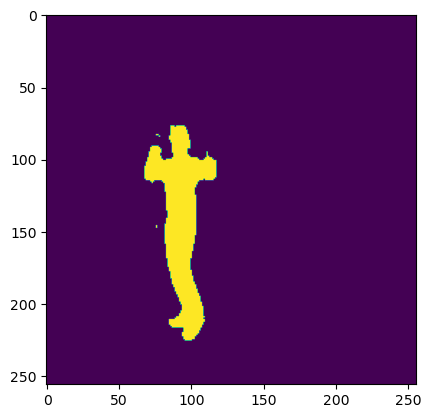

In [9]:
plt.imshow(masks_arr[1])

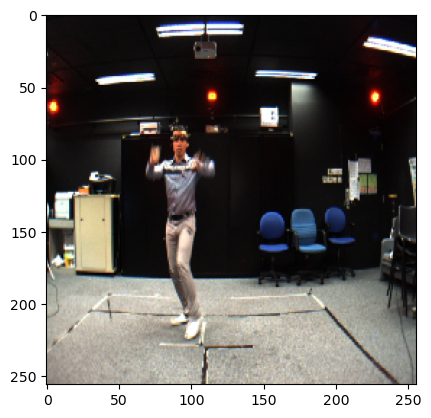

In [10]:
plt.imshow(array_to_img(imgs_arr[1]))

In [11]:
X_train, X_test = imgs_arr[:int(len(imgs_arr) * 0.80)], imgs_arr[int(len(imgs_arr) * 0.80):]
y_train, y_test = masks_arr[:int(len(masks_arr) * 0.80)], masks_arr[int(len(masks_arr) * 0.80):]

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, BatchNormalization, Lambda

model = Sequential()

# Encoder
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(Dropout(0.1))

# Bottleneck
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(Dropout(0.1))

# Decoder
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(Dropout(0.1))

# Output layer
model.add(Conv2D(1, (1, 1), activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 157s 5s/step - accuracy: 0.8484 - loss: 17.0743 - val_accuracy: 0.9267 - val_loss: 0.4098
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 155s 5s/step - accuracy: 0.9459 - loss: 0.4738 - val_accuracy: 0.9273 - val_loss: 0.4150
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step - accuracy: 0.9555 - loss: 0.4045 - val_accuracy: 0.9273 - val_loss: 0.4044
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step - accuracy: 0.9562 - loss: 0.3776 - val_accuracy: 0.9273 - val_loss: 0.3858
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step - accuracy: 0.9568 - loss: 0.3530 - val_accuracy: 0.9273 - val_loss: 0.3784
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 193s 6s/step - accuracy: 0.9552 - loss: 0.3295 - val_accuracy: 0.9273 - val_loss: 0.3816
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 169s 6s/step - accuracy: 0.9556 - loss: 0.2949 - val_accuracy: 0.9280 - val_loss: 0.3970
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 220s 7s/step - accuracy: 0.9583 - loss: 0.2753 - val_accuracy: 0.9383 - 

In [14]:
model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 836ms/step - accuracy: 0.9266 - loss: 0.4887


[0.34000012278556824, 0.9395840167999268]

original image

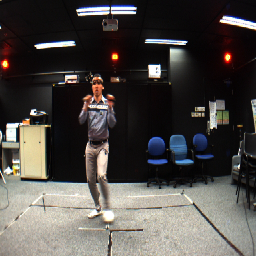

In [15]:
array_to_img(imgs_arr[0])

predicted mask

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


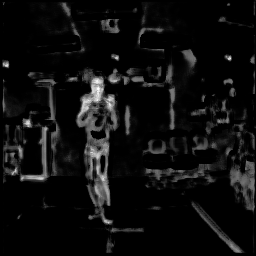

In [16]:
array_to_img(model.predict(imgs_arr[0].reshape((1, 256, 256,3))).reshape((256, 256, 1)))

original mask

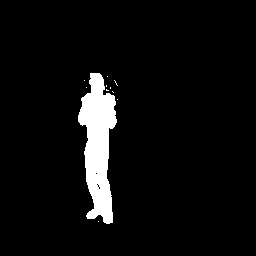

In [17]:
array_to_img(masks_arr[0])

In [19]:
import cv2

image = np.asarray(load_img('C:\\Users\\jhanu\\Downloads\\internship\\segmentation_full_body_mads_dataset_1192_img\\segmentation_full_body_mads_dataset_1192_img\\images\\HipHop_HipHop1_C0_00180.png'), dtype = 'uint8')

# here should be output from model (mask) just now I haven't time to train the model, sorry, and I use ready-made images

gray = img_to_array(load_img('C:\\Users\\jhanu\\Downloads\\internship\\segmentation_full_body_mads_dataset_1192_img\\segmentation_full_body_mads_dataset_1192_img\\masks\\HipHop_HipHop1_C0_00180.png', target_size = (384, 512, 1), color_mode="grayscale" )).reshape((384, 512)).astype('uint8')

_, binary = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)

black_back_img = image * np.asarray(binary / 255, dtype = 'uint8').reshape(384, 512, 1)

In [20]:
_, anti_img = cv2.threshold(black_back_img, 1, 255, cv2.THRESH_BINARY)

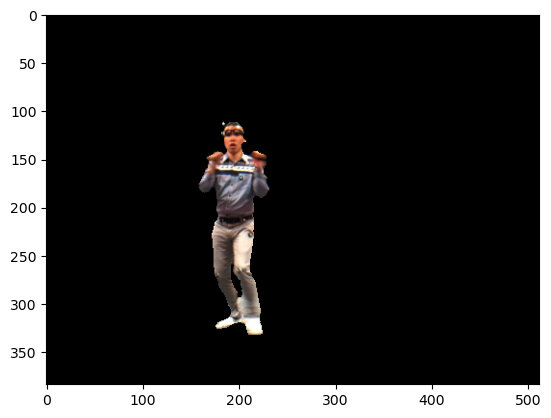

In [21]:
plt.imshow(black_back_img)

In [22]:
white_back_binary = np.ones(shape = (anti_img.shape)) - anti_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


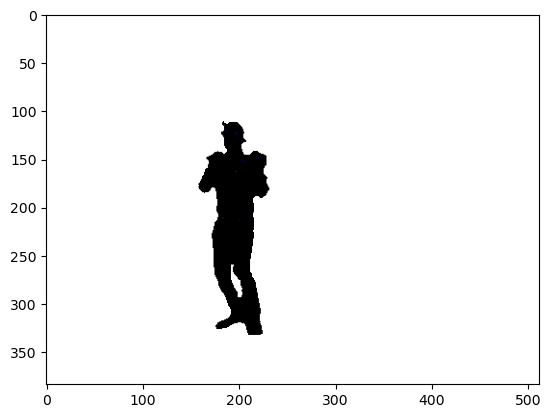

In [23]:
plt.imshow(white_back_binary)

In [36]:
target_img = img_to_array(load_img("C:\\Users\\jhanu\\Downloads\\background.jpg"), dtype = 'uint8')

In [25]:
second_part = array_to_img(
    img_to_array(array_to_img(white_back_binary).resize((256, 256))) * img_to_array(array_to_img(image).resize((256, 256))))

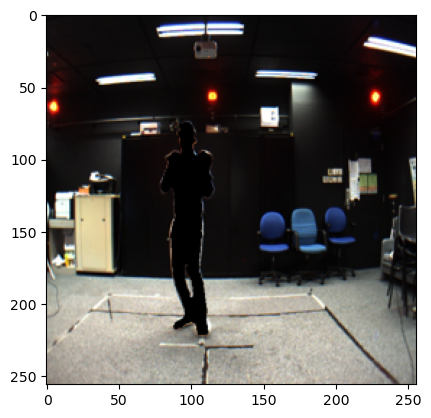

In [26]:
plt.imshow(second_part)

In [27]:
third_part = img_to_array(array_to_img(black_back_img).resize((256, 256))).astype('uint8') + img_to_array(array_to_img(white_back_binary).resize((256, 256))).astype('uint8')
          

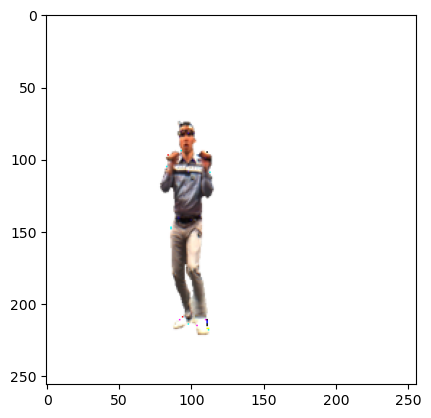

In [28]:
plt.imshow(third_part)

In [29]:
collage= np.zeros(shape = (256, 256 * 3, 3), dtype = 'uint8')

In [30]:
collage[:, :256] = img_to_array(array_to_img(image).resize((256, 256)))
collage[:, 256 : 256 * 2] = second_part
collage[:, 256 * 2: 256 * 3] = third_part

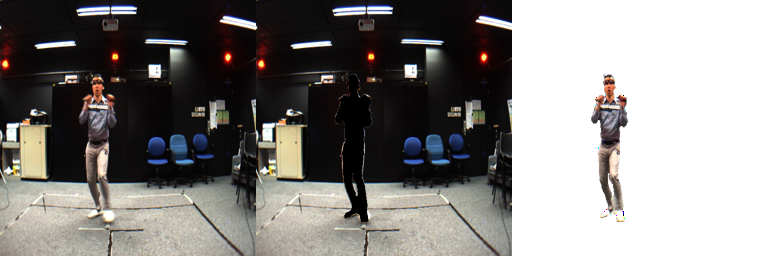

In [31]:
array_to_img(collage)

I made a function for this processing

In [32]:
# put everything here

#  function takes original image and mask asnd return collage
# instead path to mask here should be output from model (mask) just now I haven't time to train the model, sorry, and I use ready-made images

def make_collage(image_path, mask_path):
    
    import cv2
    
#     original image
    image = np.asarray(load_img(image_path), dtype = 'uint8')
#     mask - output of your model(neural network)
    gray = img_to_array(load_img(mask_path, target_size = (384, 512, 1), color_mode="grayscale" )).reshape((384, 512)).astype('uint8')
# binarization
    _, binary = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)

    black_back_img = image * np.asarray(binary / 255, dtype = 'uint8').reshape(384, 512, 1)

    _, anti_img = cv2.threshold(black_back_img, 1, 255, cv2.THRESH_BINARY)

    white_back_binary = np.ones(shape = (anti_img.shape)) - anti_img

    second_part = array_to_img(
        img_to_array(array_to_img(white_back_binary).resize((256, 256))) * img_to_array(array_to_img(image).resize((256, 256))))

    third_part = img_to_array(array_to_img(black_back_img).resize((256, 256))).astype('uint8') + img_to_array(array_to_img(white_back_binary).resize((256, 256))).astype('uint8')

    collage= np.zeros(shape = (256, 256 * 3, 3), dtype = 'uint8')

    collage[:, :256] = img_to_array(array_to_img(image).resize((256, 256)))
    collage[:, 256 : 256 * 2] = second_part
    collage[:, 256 * 2: 256 * 3] = third_part

    array_to_img(collage)
    
    return collage

In [37]:


fourth_part =  array_to_img(
        img_to_array(array_to_img(target_img).resize((256, 256))) + img_to_array(array_to_img(black_back_img).resize((256, 256))).astype('uint8')
    )


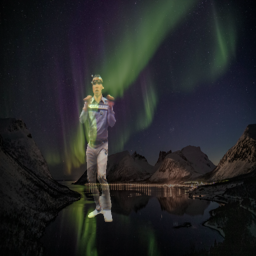

In [38]:
array_to_img(fourth_part)

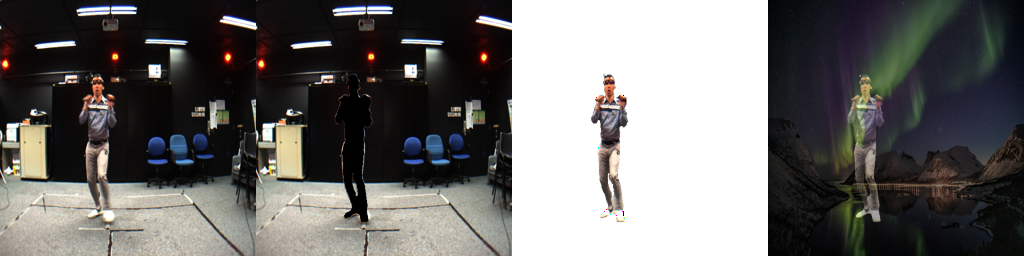

In [39]:
collage1= np.zeros(shape = (256, 256 * 4, 3), dtype = 'uint8')
collage1[:, :256] = img_to_array(array_to_img(image).resize((256, 256)))
collage1[:, 256 : 256 * 2] = second_part
collage1[:, 256 * 2: 256 * 3] = third_part
collage1[:, 256 * 3: 256 * 4] = fourth_part


array_to_img(collage1)